# 今までのおさらい

# 教師あり学習（機械学習）のアルゴリズム
1. ある複数の入力データ「X」とそれの対となる正解データ「Y」、また正解が未知のデータセット「X_test」があると仮定する。
2. XからYを予測するモデルをトレーニングする。
3. 正解が未知のデータセット「X_test」が入力として与えられた場合、未知の正解「Y_test」を予測する。

# 教師なし学習(機械学習)のアルゴリズム
1. ある複数の入力データ「X」があるとする
2. ある複数の入力データ「X」で似た者同士を、特徴が似ている者同士でグルーピングする


# 強化学習のアルゴリズム
- ある環境に置かれたエージェントが、最適な方策を選び、行動する。
- 学習中は、うまく行動できた場合に報酬を与える

# 今日やること
- すべての機械学習で必須となる最適化のアルゴリズムについて

# 最適化とは？
- 機械学習のモデルを使用することで求められた「予測値と」「正解値」の誤差を最小化（もしくは最大化）すること

# 最適化関数について
- SGD
- Momentum
- AdaGrad
- RMSProp
- AdaDelta
- Adam

In [1]:
%matplotlib notebook
import numpy as np
import copy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def function_1(x):
    return 1./20 * x[0]**2 + x[1]**2

def function_2(x):
    return -2*x[0]**2 + x[1]**2 + x[0]**4 + x[0]/3 + (x[1] - 0.5)**2
def numerical_gradient(f, x):
    h = 1e-5
    grad = np.zeros_like(x)

    for i in range(x.size):
        tmp_val = x[i]

        x[i] = tmp_val + h
        fxh1 = f(x)

        x[i] = tmp_val - h
        fxh2 = f(x)

        grad[i] = (fxh1 - fxh2) / (2*h)
        x[i] = tmp_val

    return grad


def plot_history(f, history):
    x = np.linspace(-20, 20, 1000)
    y = np.linspace(-20, 20, 1000)
    x1, x2 = np.meshgrid(x, y)
    x3 = f([x1, x2])

    plt.contour(x1, x2, x3, levels=[i * 5.0 for i in range(1, 20)])
    plt.gca().set_aspect("equal")

    plt.plot([p[0] for p in history], [p[1] for p in history], marker="o")

    plt.show()


def plot3d_history(f, history):
    x = np.linspace(-20, 20, 1000)
    y = np.linspace(-20, 20, 1000)
    x1, x2 = np.meshgrid(x, y)
    x3 = f([x1, x2])
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1, x2, x3)
    
    p1, p2 = np.array([p[0] for p in history]), np.array([p[1] for p in history])
    p3 = f([p1, p2])
    ax.plot(p1, p2, p3, "o-", c="r", ms=4, mew=0.5)
    
    
def optimize(optimizer):
    X = np.array([-16.0, 10.0])
    
    pos = []
    for c in range(3000):
        pos.append(copy.deepcopy(X))
        g = numerical_gradient(function_1, X)
        optimizer.update(X, g)

    plot_history(function_1, pos)
    plot3d_history(function_1, pos)

def optimize2(optimizer):
    X = np.array([-16.0, 10.0])
    
    pos = []
    for c in range(3000):
        pos.append(copy.deepcopy(X))
        g = numerical_gradient(function_2, X)
        optimizer.update(X, g)

    plot_history(function_2, pos)
    plot3d_history(function_2, pos)

In [3]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for i in range(params.size):
            params[i] -= self.lr * grads[i]

<IPython.core.display.Javascript object>


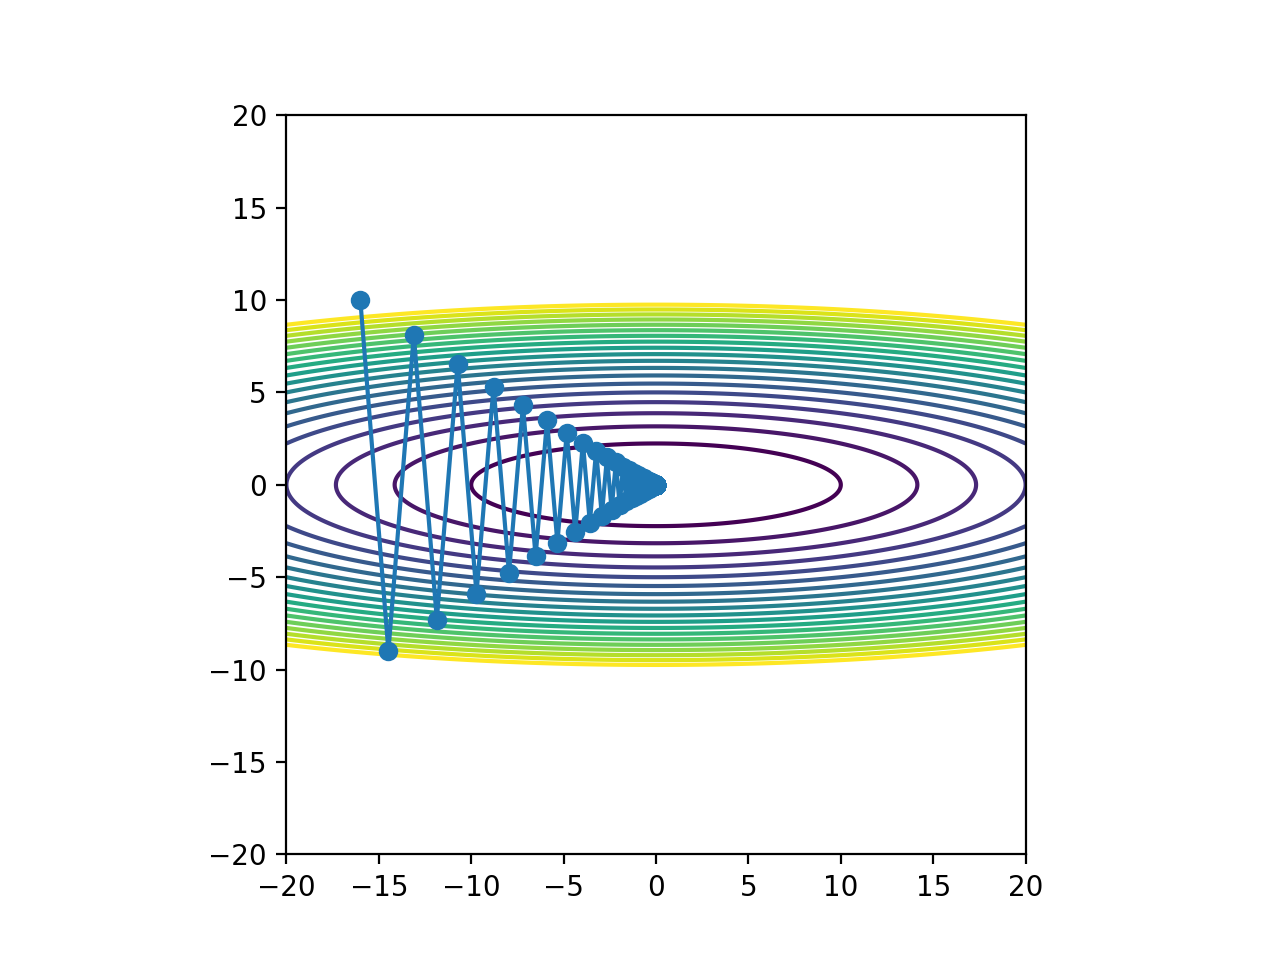

<IPython.core.display.Javascript object>


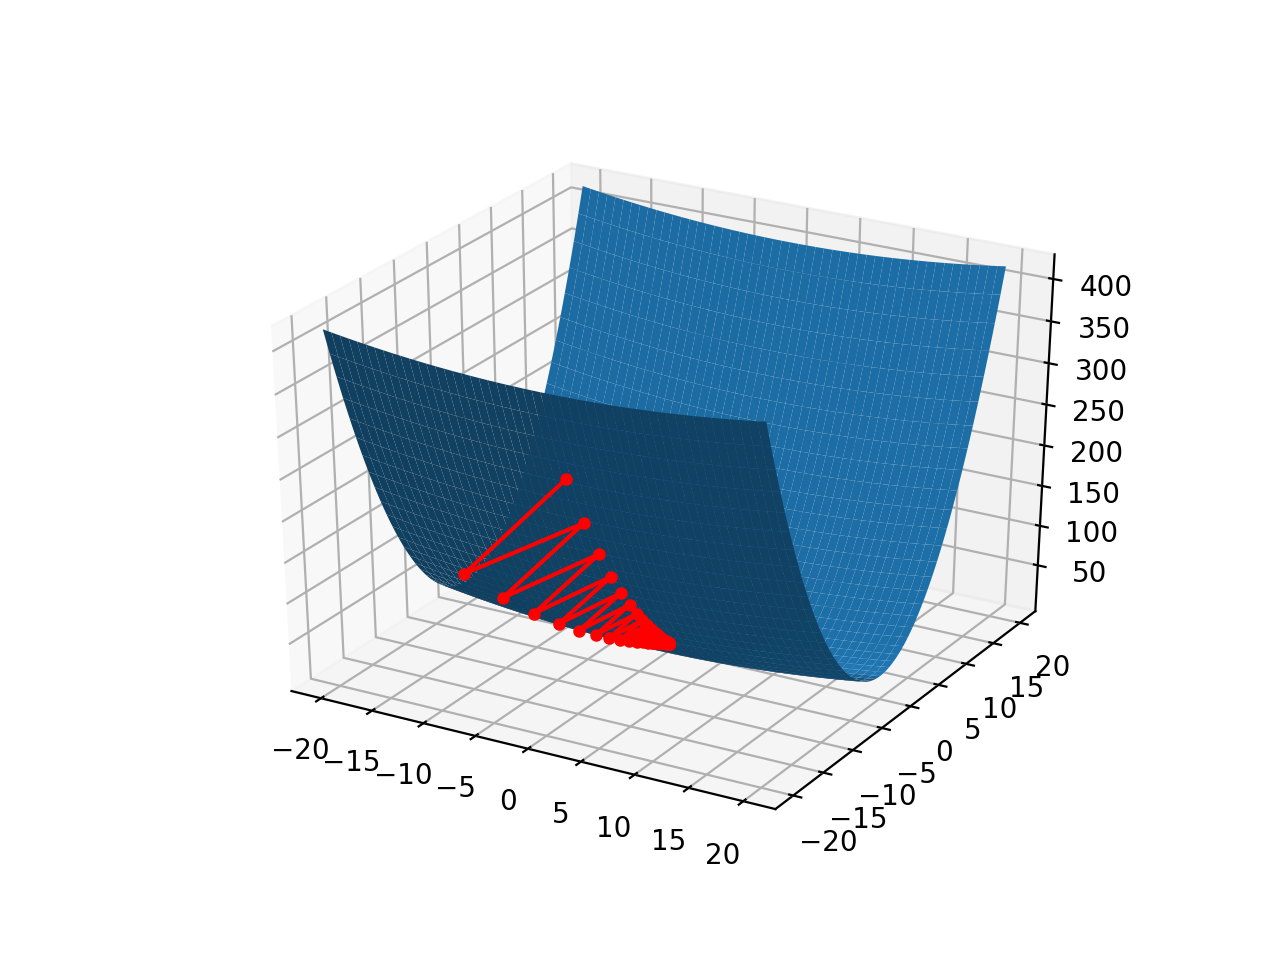

In [15]:
%matplotlib notebook
optimize(SGD(lr=0.95))

In [5]:
%matplotlib notebook
class Momentum:
    def __init__(self, lr=0.01, a=0.9):
        self.lr = lr
        self.a = a
        self.v = np.zeros(2)

    def update(self, params, grads):
        for i in range(params.size):
            self.v[i] = self.a * self.v[i] - self.lr * grads[i] 
            params[i] += self.v[i]

<IPython.core.display.Javascript object>


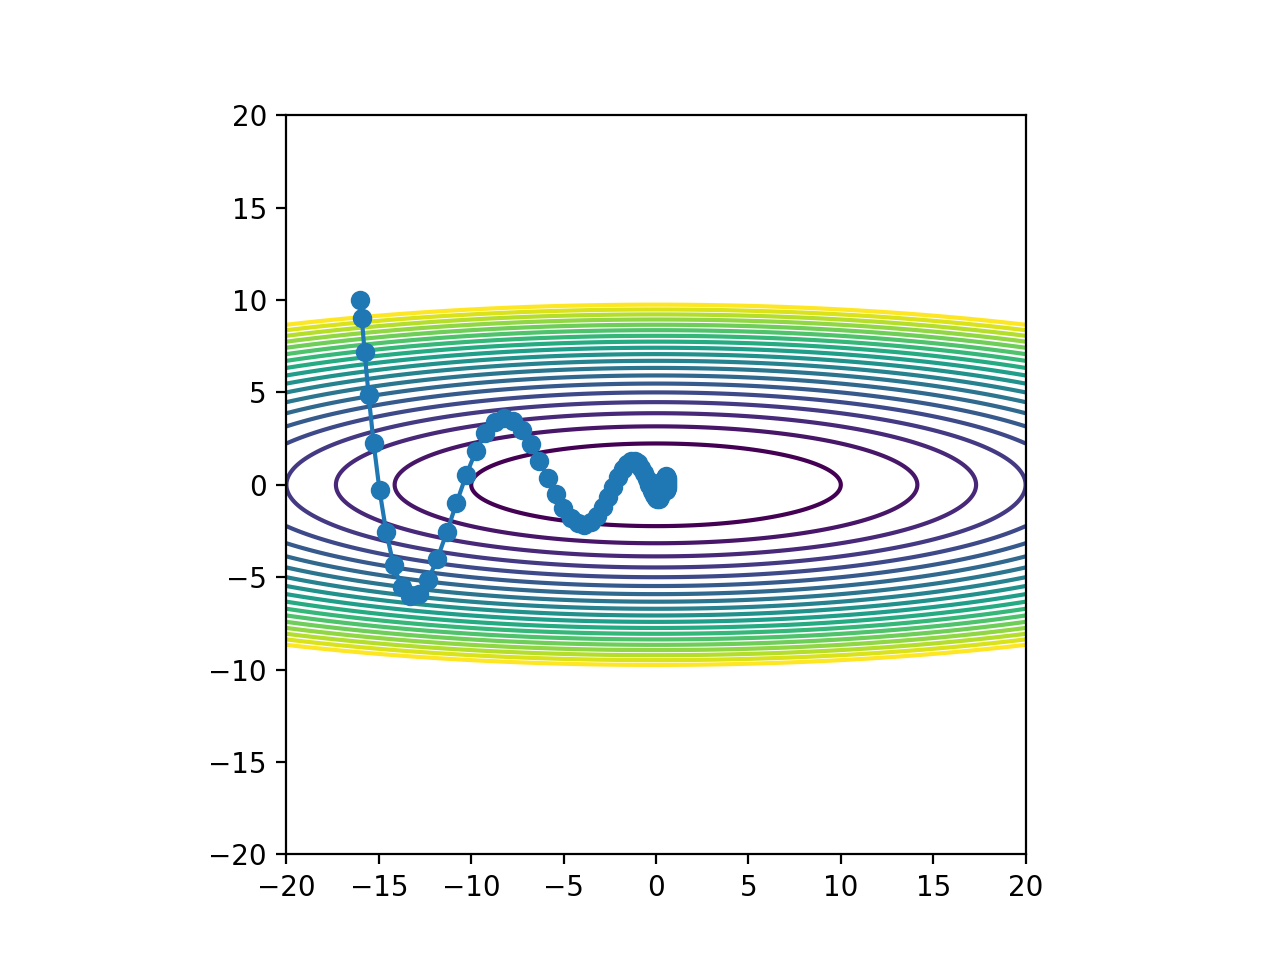

<IPython.core.display.Javascript object>


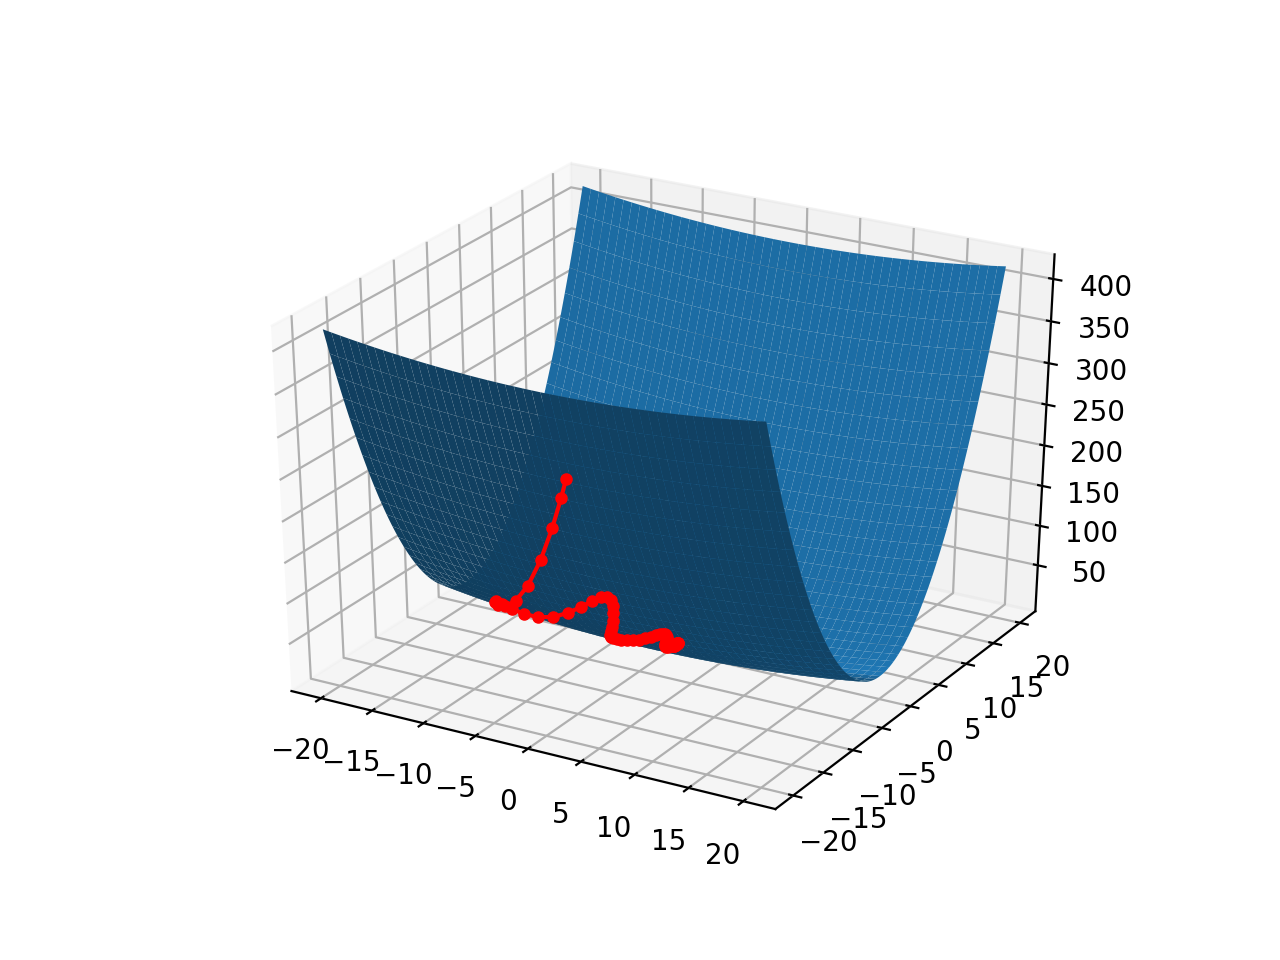

In [16]:
%matplotlib notebook
optimize(Momentum(lr=0.05, a=0.9))


In [7]:
%matplotlib notebook
class AdaGrad:
    def __init__(self, lr=0.001):
        self.lr = lr
        self.e = 1e-8
        self.h = np.zeros(2)

    def update(self, params, grads):
        for i in range(params.size):
            self.h[i] += grads[i] ** 2
            params[i] -= self.lr / (np.sqrt(self.h[i]) + self.e) * grads[i]

$$
{h_{0} = \epsilon\\
h_{t} = h_{t−１} + \nabla E(\mathbf{w}^{t})^{2}\\
\eta_{t} = \frac{\eta_{0}}{\sqrt{h_{t}}}\\
\mathbf{w}^{t+1} = \mathbf{w}^{t} - \eta_{t} \nabla E(\mathbf{w}^{t})
}
$$

# 解説
- np.sqrtはルートのこと
- self.hの値が大きくなるほど、self.h[i]に加算されてゆくので、下の段の「self.lr / (np.sqrt(self.h[i]) + self.e)」の値が小さくなる
- 勾配も回数を重ねるごとに小さくなってゆく
- いままでの勾配を加味して降ってゆく
- ゼロ除算をさけるため、分母にself.eを追加
- 更新があまり行われていないパラメータについては、htの値が小さいままで、ntの値が大きくなるので、learning rateが大きくなる
- 学習初期に勾配のきついところを通ると、学習率が小さくなってしまい、学習が進まなくなる問題点


<IPython.core.display.Javascript object>


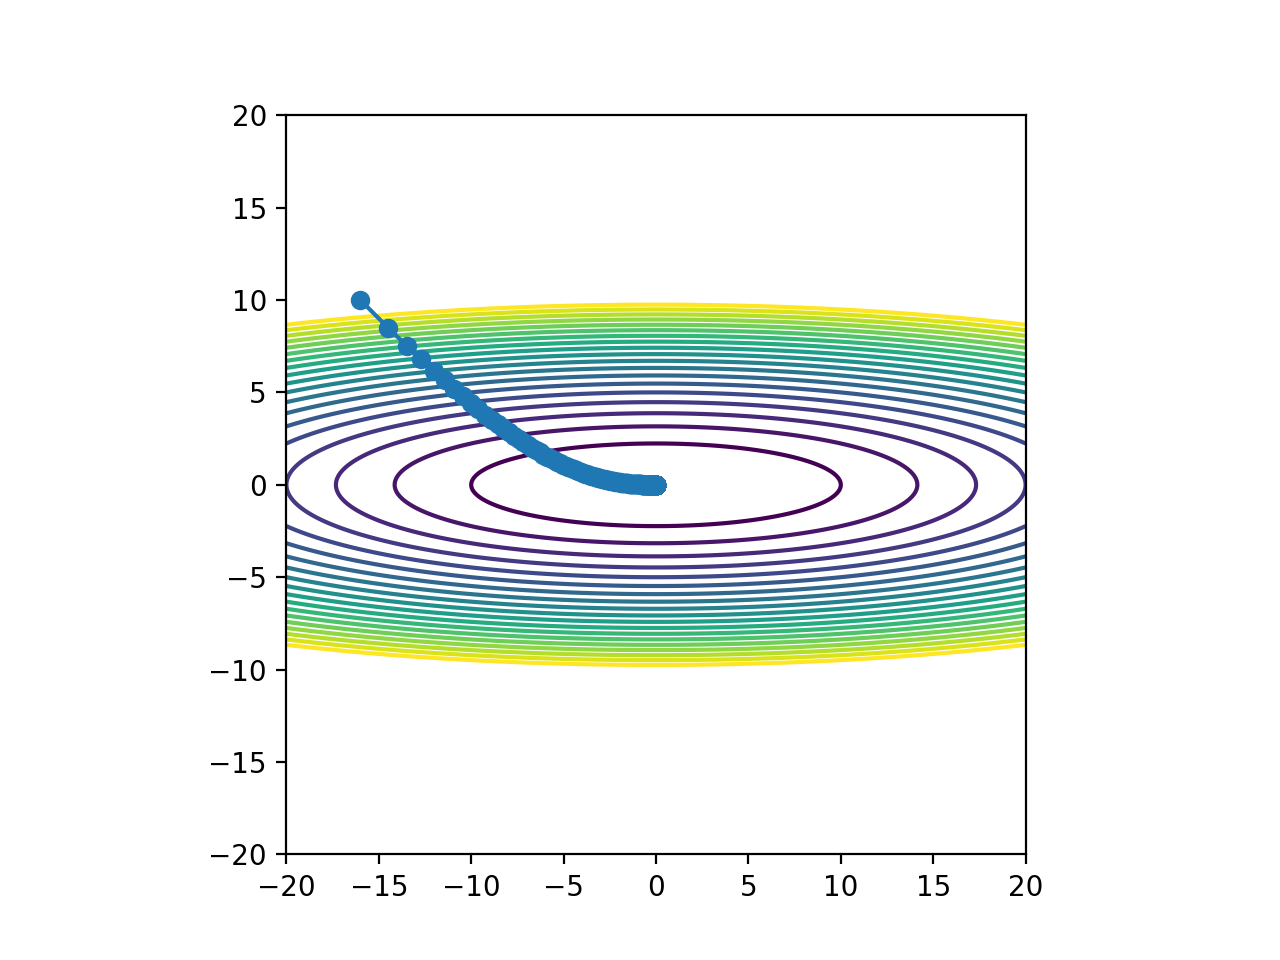

<IPython.core.display.Javascript object>


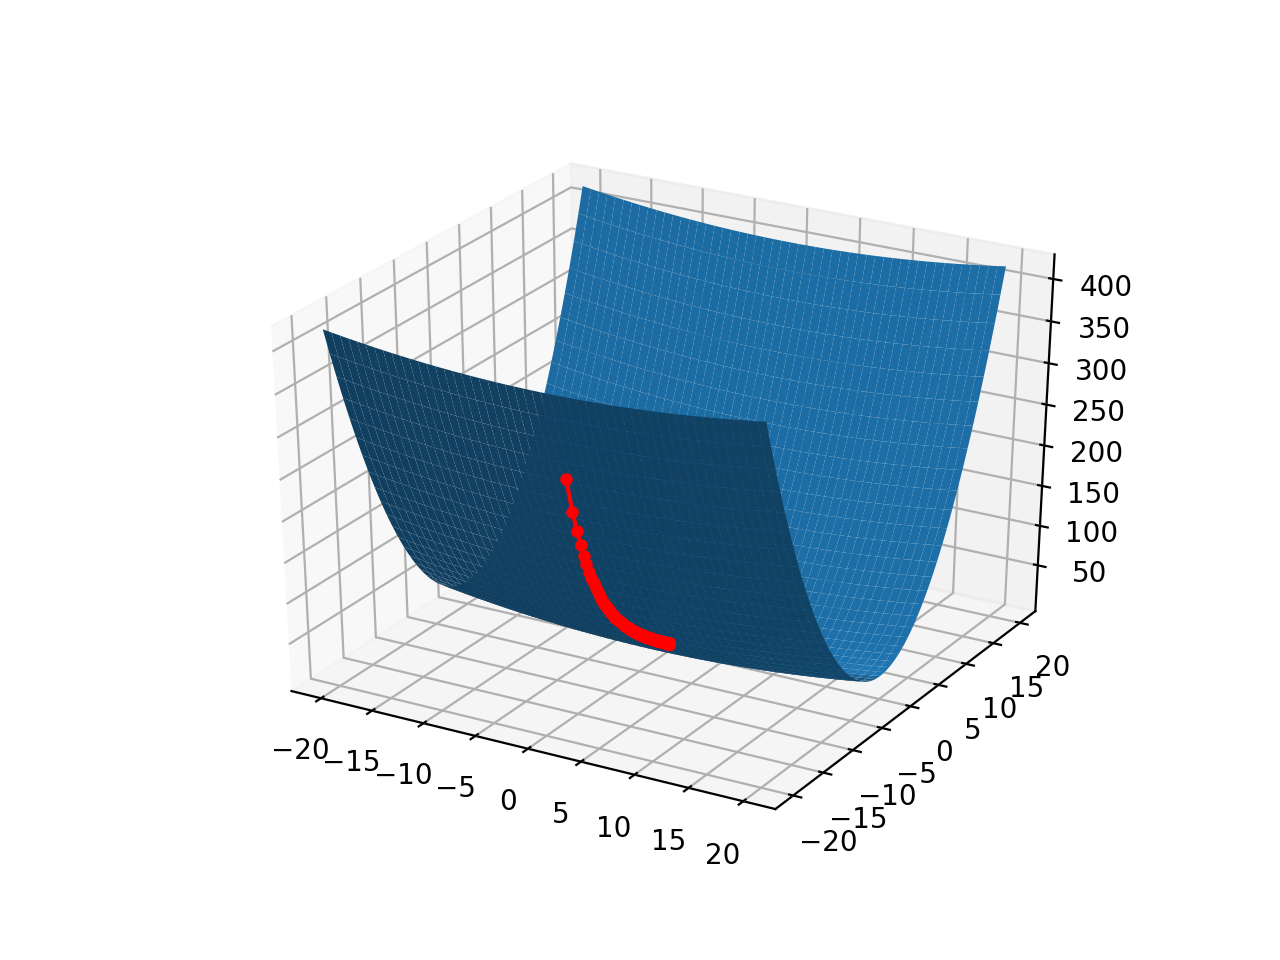

In [17]:
%matplotlib notebook
optimize(AdaGrad(lr=1.5))

In [9]:
%matplotlib notebook
class RMSProp:
    def __init__(self, lr=0.01, a=0.99):
        self.lr = lr
        self.a = a
        self.e = 1e-8
        self.h = np.zeros(2)
        

    def update(self, params, grads):
        for i in range(params.size):
            self.h[i] = self.a * self.h[i] + (1 - self.a) * grads[i] ** 2
            #print(self.h[i])
            params[i] -= self.lr  / (np.sqrt(self.h[i]) + self.e) * grads[i]
            #print(self.lr/(np.sqrt(self.h[0]) + self.e))

- grads[i] ** 2で勾配が自乗されて小さくなる
- self.lr * grads[i]　を 大きくなった(√self.h[i]* self.e)で割る
- 勾配の係数部分「self.lr/(np.sqrt(self.h[i]) + self.e)」が徐々に大きくなる？
- AdaGradでは過去の勾配情報を全て均等に考慮して計算が行われていたが、より直近の勾配情報を優先して計算するようになった
- 移動指数平均を採用

<IPython.core.display.Javascript object>


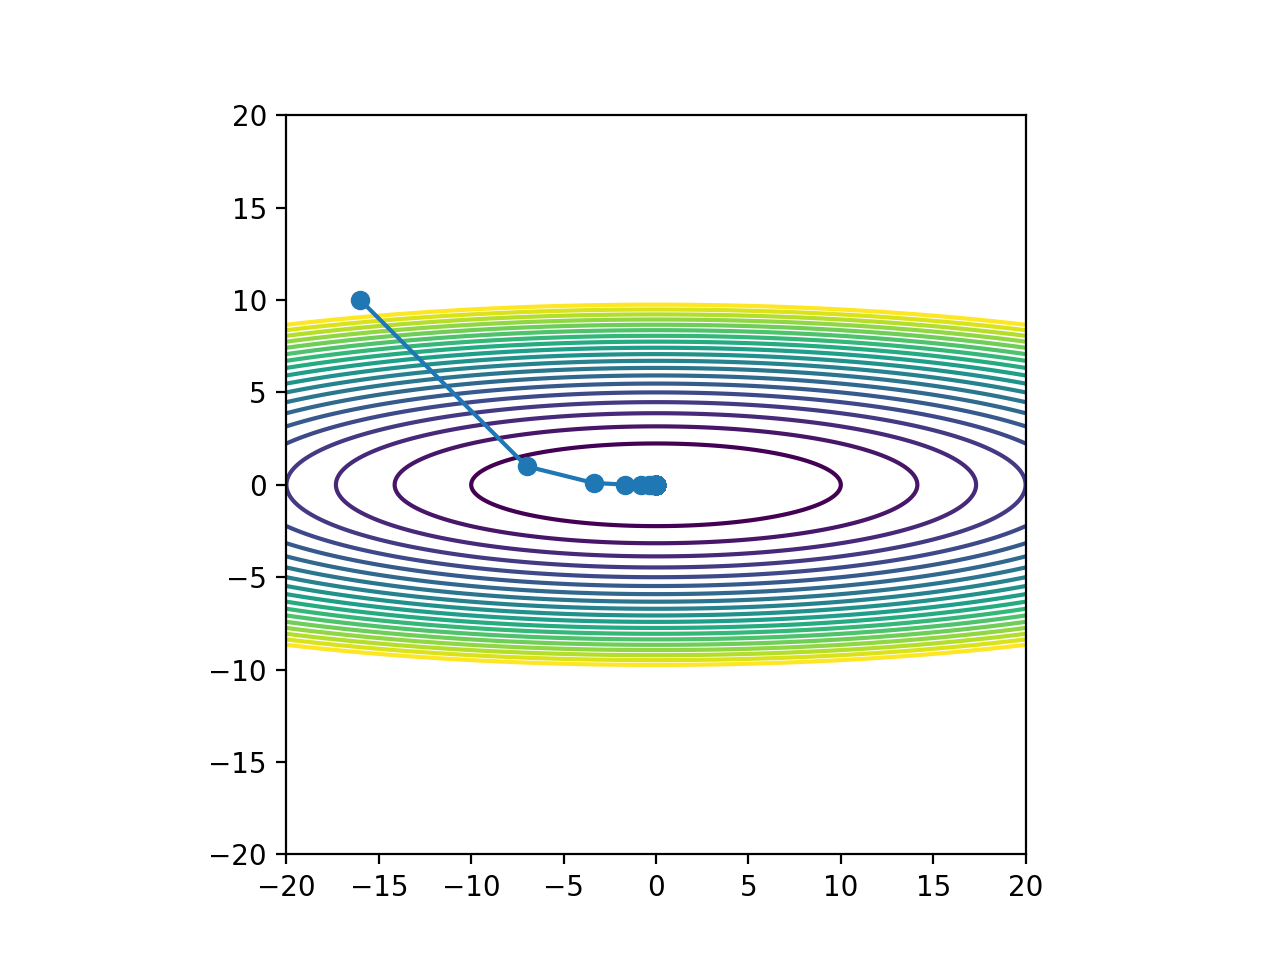

<IPython.core.display.Javascript object>


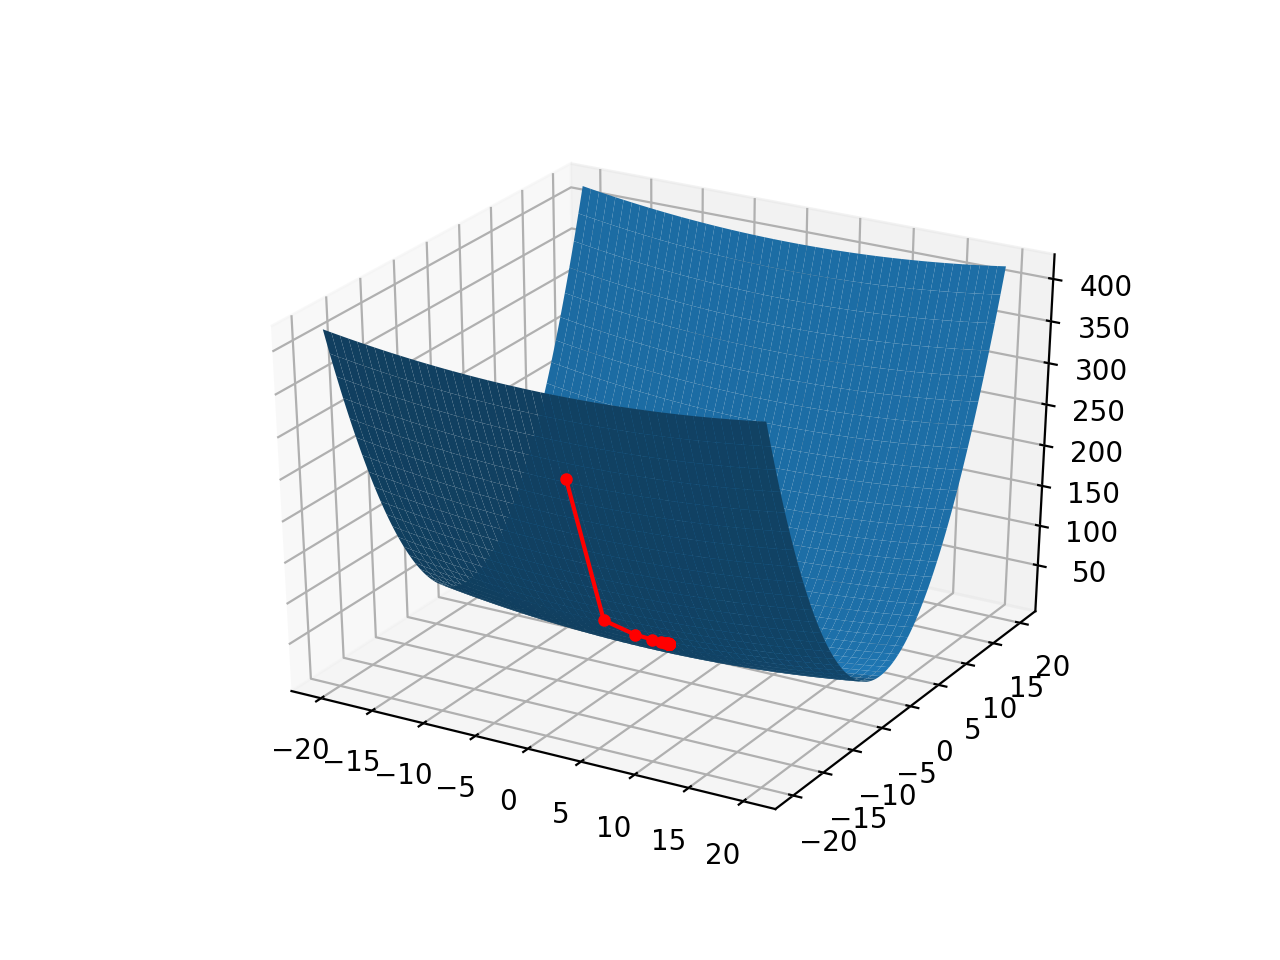

In [18]:
%matplotlib notebook
optimize(RMSProp(lr=0.9))

In [11]:
%matplotlib notebook
class AdaDelta:
    def __init__(self, p=0.95, e=1e-8):
        self.p = p
        self.e = e
        self.h = np.zeros(2)
        self.s = np.zeros(2)

    def update(self, params, grads):
        for i in range(params.size):
            self.h[i] = self.p * self.h[i] + (1 - self.p) * grads[i] ** 2
            v = np.sqrt(self.s[i] + self.e) / np.sqrt(self.h[i] + self.e) * grads[i]
            params[i] -= v
            self.s[i] = self.p * self.s[i] + (1 - self.p) * v ** 2

- vtの分子はstなので、stが大きくなるほど勾配が大きくなる。
- 勾配が大きいほどvtが大きくなる　vtが大きくなると、次のステップで使うstも大きくなる。（vtの２乗しているから）次のステップで使うstが大きいほど、次のステップでの勾配も大きくなる。stが大きくなるほど、vtも大きくなる
- まとめ
  - 前のステップでの勾配が大きいと、次のステップでの勾配は大きくなる
  - 前のステップでの勾配が小さいと、次のステップでの勾配は小さくなる
$$
{h_{t} = \rho h_{t−１} + (1 - \rho) \nabla E(\mathbf{w}^{t})^{2}\\
v_{t} = \frac{\sqrt{s_{t} + \epsilon}}{\sqrt{h_{t} + \epsilon}} \nabla E(\mathbf{w}^{t})\\
s_{t+1} = \rho s_{t} + (1 - \rho) v_{t}^{2}\\
\mathbf{w}^{t+1} = \mathbf{w}^{t} - v_{t}
}
$$
- 過去の勾配の２乗和を全て使うのではなくて、最近のものだけを使う。そのために、指数平滑移動平均を使う。<br>

- ht...過去の勾配の平均
- vt...今回の更新量を求めるために単位合わせ(今回の勾配 * (過去の更新差分の平均/過去の勾配の平均)) 
- st+1...更新差分の平均


<IPython.core.display.Javascript object>


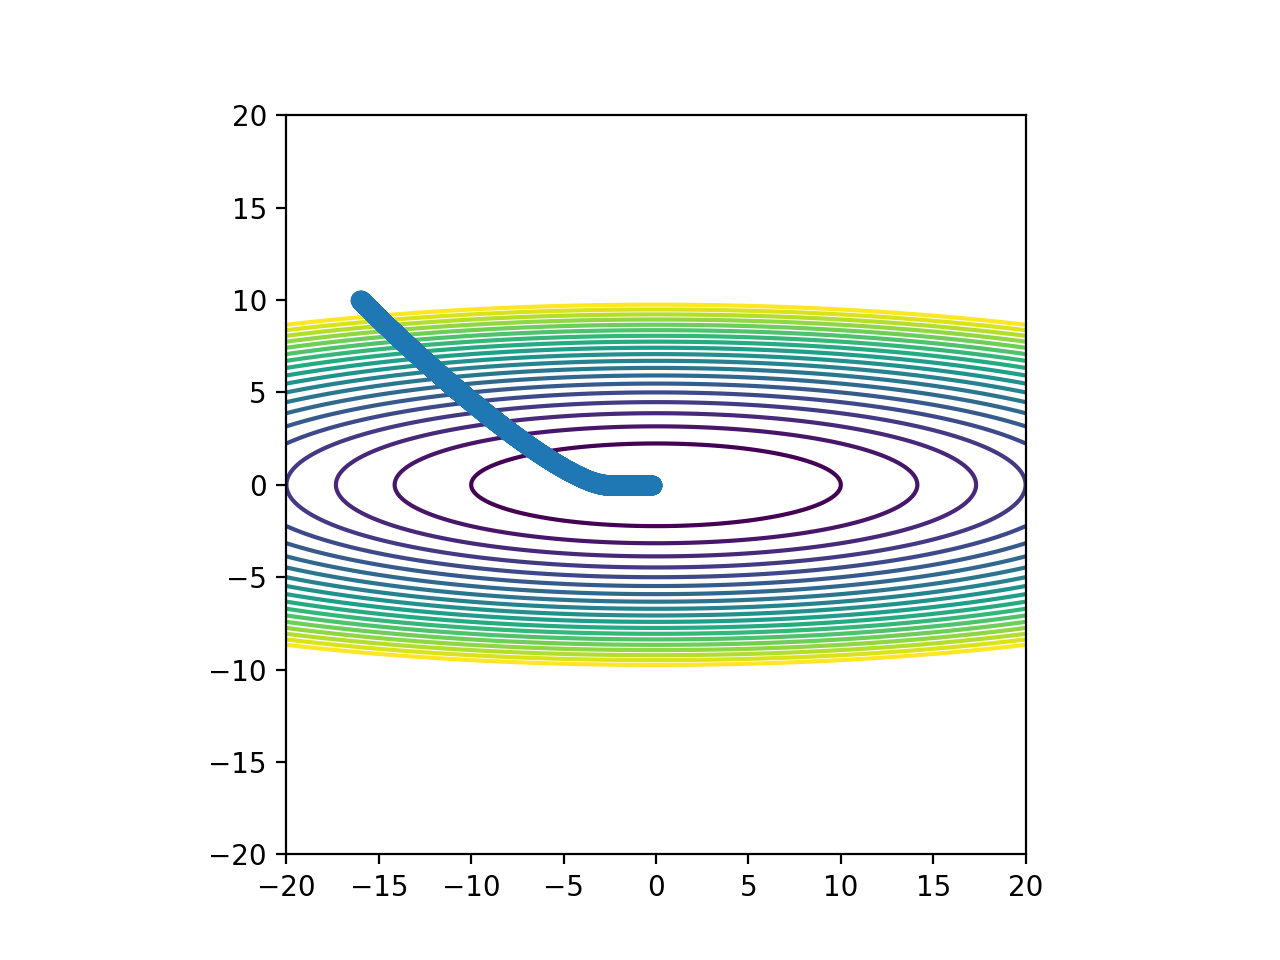

<IPython.core.display.Javascript object>


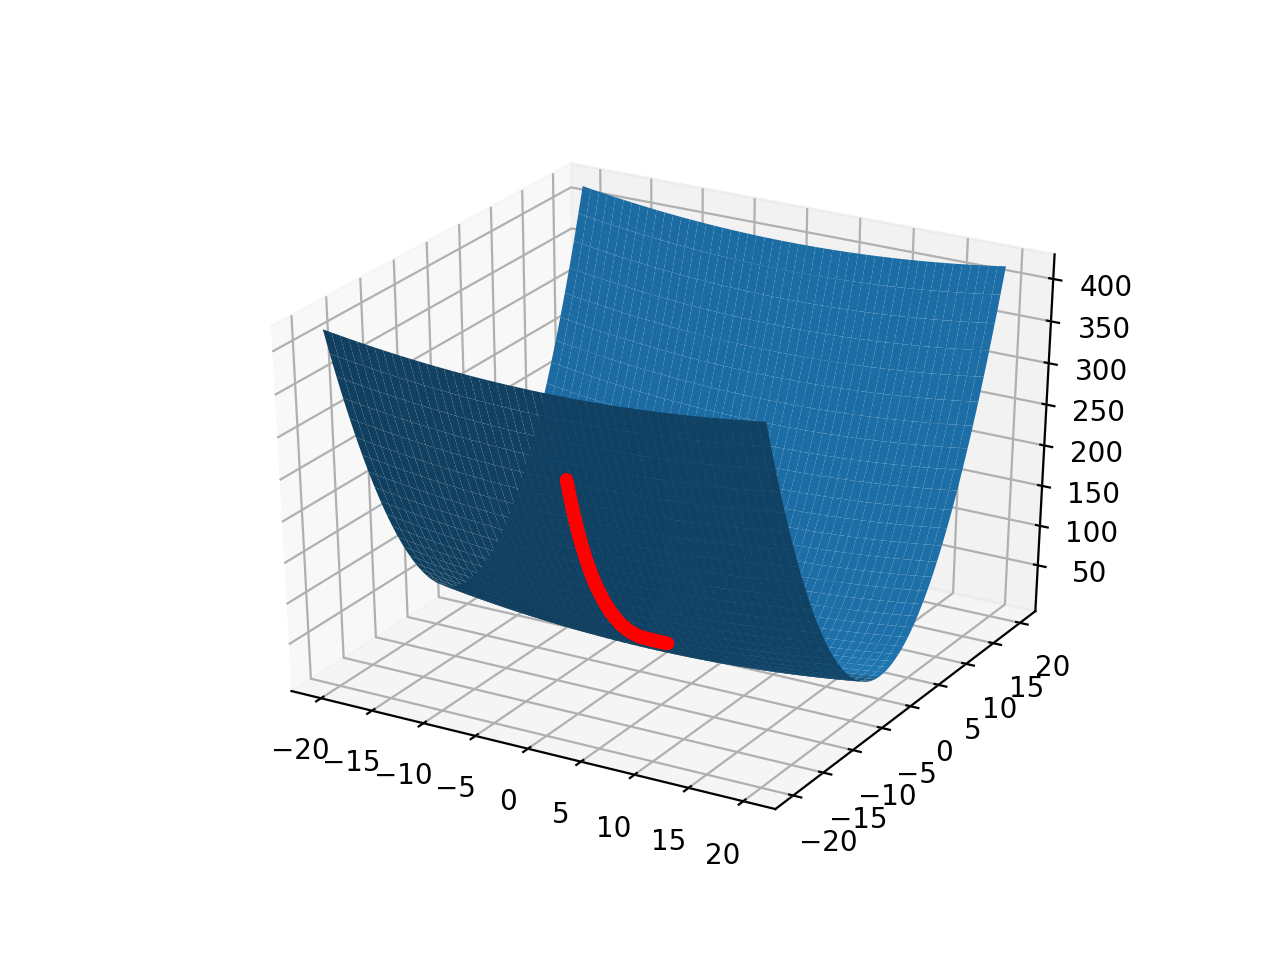

In [19]:
%matplotlib notebook
optimize(AdaDelta(e=1e-6))

In [13]:
%matplotlib notebook
class Adam:
    def __init__(self, lr=0.001, b1=0.9, b2=0.999, e=1e-8):
        self.lr = lr
        self.b1 = b1
        self.b2 = b2
        self.e = e
        self.m = np.zeros(2)
        self.v = np.zeros(2)
        self.t = 1

    def update(self, params, grads):
        for i in range(params.size):
            self.m[i] = self.b1 * self.m[i] + (1 - self.b1) * grads[i]
            self.v[i] = self.b2 * self.v[i] + (1 - self.b2) * grads[i] ** 2
            mt = self.m[i] / (1 - self.b1 ** self.t)
            vt = self.v[i] / (1 - self.b2 ** self.t)
            params[i] -= self.lr * mt / (np.sqrt(vt) + self.e)
            self.t += 1

$${m_{t+1} = \beta_{1} m_{t} + (1 - \beta_{1}) \nabla E(\mathbf{w}^{t})\\
v_{t+1} = \beta_{2} v_{t} + (1 - \beta_{2}) \nabla E(\mathbf{w}^{t})^{2}\\
\hat{m} = \frac{m_{t+1}}{1 - \beta_{1}^{t}}\\
\hat{v} = \frac{v_{t+1}}{1 - \beta_{2}^{t}}\\
\mathbf{w}^{t+1} = \mathbf{w}^{t} - \alpha \frac{\hat{m}}{\sqrt{\hat{v}} + \epsilon}
}
$$
- β1,β2をtステップ数べき乗
- 最後の式では、勾配の一次モーメント(平均)を二次モーメント(分散)の指数移動平均で割る　
- 「(過去の更新差分の平均 / 過去の勾配の平均)* 現在の勾配」　単位合わせすることで、現在の更新量が求まる　
- 勾配のスケールは一次モーメントと二次モーメントの比によってキャンセルされるためstep sizeが安定する(勾配が１だと1/1=1のstep sizeになる。勾配が0.1だと0.1/0.01=10で、10倍大きなstep sizeになる。学習が進むにつれて、どうしれもstep sizeが小さくなりがちな傾向をこれで回避)
- 大きくなったvは最終的に、最後の式の分母になるので、vが大きくなるほど重みの修正量が少なくなる。
- 式の３、４行目のβ^tの部分　βは1より小さいので、べき乗すると０に近づく。1から引いているので、ステップ数を重ねるほど分母が大きくなる。つまり、式１、２行目の値は小さくなる。mはvに比べて小さくなるスピードが早い。
- $${O[m] \sim O[g] (1-\beta_1) \sum_{k=1}^t \beta_1^{t-k} = O[g](1-\beta_1^t) \tag{3.23}
}$$(詳しくはhttps://qiita.com/deaikei/items/29d4550fa5066184329a#adam)


<IPython.core.display.Javascript object>


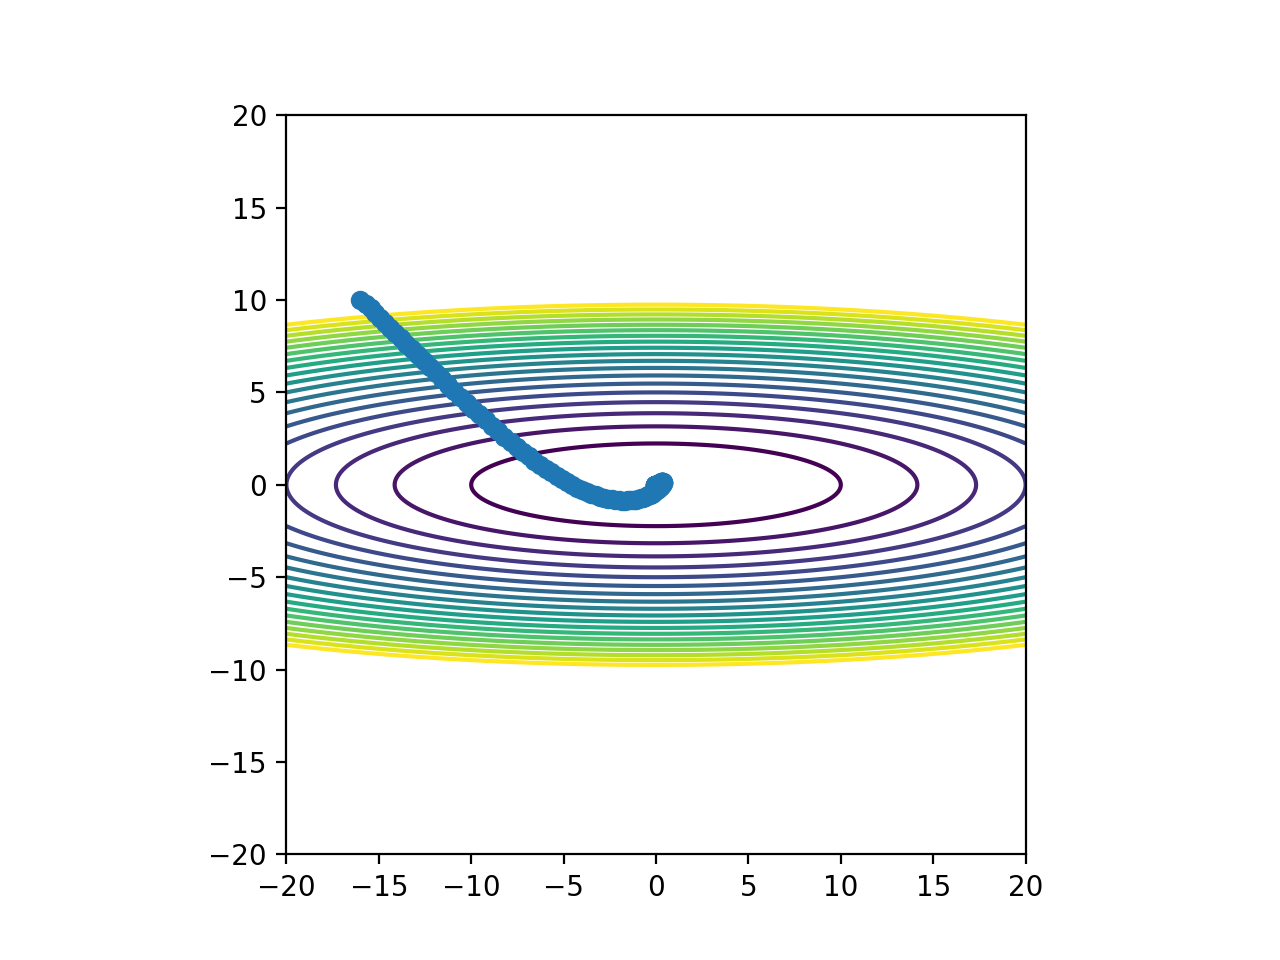

<IPython.core.display.Javascript object>


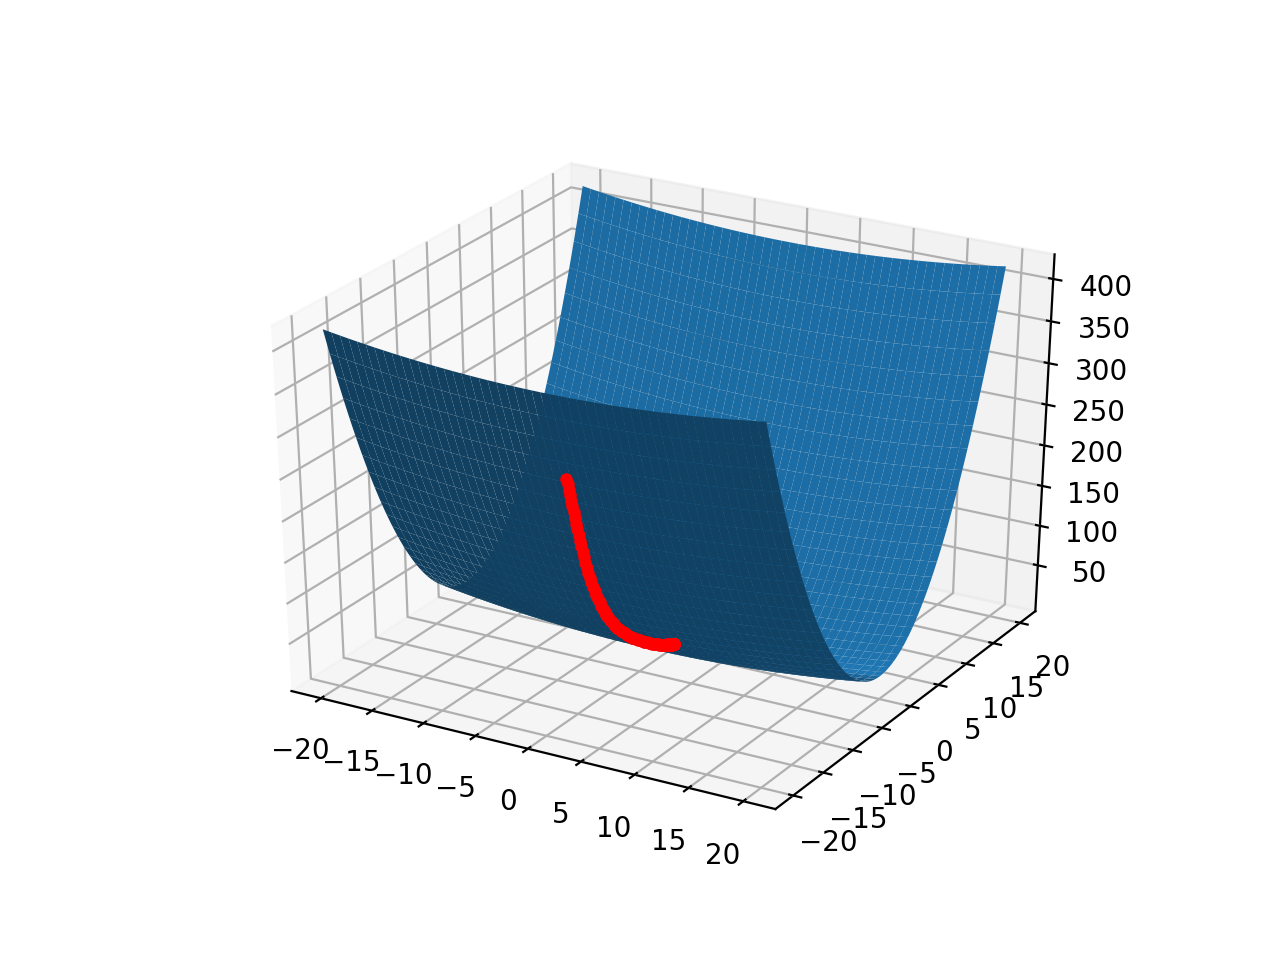

In [14]:
optimize(Adam(lr=0.3))

# 参考文献
- https://qiita.com/tokkuman/items/1944c00415d129ca0ee9 「Optimizer : 深層学習における勾配法について」
- https://www.oreilly.co.jp/books/9784873117584/　「ゼロから作るDeep Learning
――Pythonで学ぶディープラーニングの理論と実装」
- https://qiita.com/deaikei/items/29d4550fa5066184329a 「OPTIMIZER 入門 ~線形回帰からAdamからEveまで」